In [2]:
import numpy as np
import numpy.linalg as lin
import pickle as pickle
import matplotlib.pyplot as plt

file = './safe_samples/safe_samples.pickle'
with open(file, 'rb') as handler:
    safe_samples = pickle.load(handler)
image_width, image_height = safe_samples['state'][0].shape

file = 'objects'
with open(file, 'rb') as handler:
    objects = pickle.load(handler)
print(objects)

num_features = image_width + image_height
num_actions = 2

{'opponent': {'color': 213, 'rows': 8, 'cols': 2}, 'ball': {'color': 236, 'rows': 2, 'cols': 1}, 'me': {'color': 92, 'rows': 4, 'cols': 2}}


In [20]:
bk_color = 144
bk_image = np.ones((image_width, image_height), dtype = int) * 144
def phi_sum_row(img):
    ps = np.zeros((image_height))
    for r in range(image_height):
        if np.max(img[r, :]) == 0:
            feat = np.min(img[r, :])
        else:
            feat = np.max(img[r, :])
        ps[r] = feat
    return ps


def phi_sum_col(img):
    ps = np.zeros((image_width))
    for c in range(image_width):
        if np.max(img[:, c]) == 0:
            feat = np.min(img[:, c])
        else:
            feat = np.max(img[:, c])
        ps[c] = feat
    return ps

def phi_sum(img):
    return np.hstack([phi_sum_row(img), phi_sum_col(img)])

states = safe_samples['state']
num_samples = states.shape[0]
Phi = np.zeros((num_samples, num_features))
for i in range(num_samples):
    Phi[i] = phi_sum(states[i] - bk_image)
print(Phi.shape)
print(np.count_nonzero(Phi))

(10000, 160)


65.5211926114


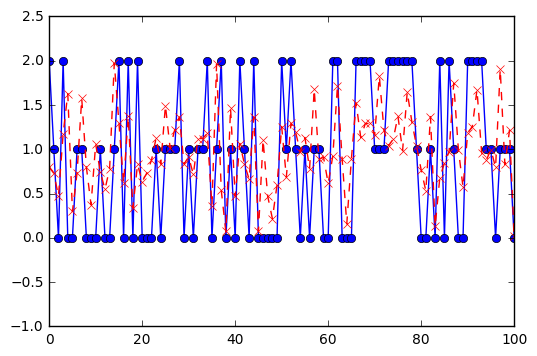

In [21]:
X = Phi
y = safe_samples['reward']
w = lin.solve(np.matmul(X.T, X), np.matmul(X.T, y))
y_fit = np.matmul(X, w)
print(lin.norm(y_fit-y))
plt.plot(y, '-bo')
plt.plot(y_fit, '--rx')
plt.xlim(0, 100)
plt.show()

In [22]:
np.count_nonzero(Phi)

182395

In [ ]:
"resutls are not good. "